In [2]:
import pandas as pd

train = pd.read_csv('/Users/hongseongmi/Documents/git_ws/Yooninahong/description/data/captionTrain - captionTrain.csv')
train.head()

,sentence
0,사람이 다가오고 있습니다
1,사람이 있습니다
2,사람이 앞에 있습니다
3,사람과 자전거가 다가오고 있습니다
4,자전거와 사람이 다가오고 있습니다


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  111 non-null    object
dtypes: object(1)
memory usage: 1016.0+ bytes


음절 단위

In [4]:
vocab = set()
for i, row in train.iterrows(): # dataframe의 row별로 반복
    sentence = row['sentence']
    for token in sentence: #음절 단위 token 반복
        if token not in vocab:
            vocab.add(token) # token set에 없다면 추가
        else:
            continue
vocab.add('<EOS>') # 문장 마지막을  <EOS>로 끝낼거라 <End of Sequence> token 추가
print ('고유 문자수 {}개'.format(len(vocab)))

고유 문자수 56개


In [5]:
vocab

{' ',
 ',',
 '<EOS>',
 '가',
 '갑',
 '거',
 '걸',
 '고',
 '과',
 '놓',
 '늘',
 '니',
 '다',
 '대',
 '동',
 '되',
 '두',
 '둘',
 '드',
 '들',
 '라',
 '람',
 '러',
 '럿',
 '른',
 '를',
 '몇',
 '바',
 '보',
 '볼',
 '사',
 '서',
 '설',
 '세',
 '습',
 '앞',
 '어',
 '에',
 '여',
 '옆',
 '오',
 '옵',
 '와',
 '워',
 '이',
 '있',
 '자',
 '전',
 '져',
 '쪽',
 '차',
 '치',
 '킥',
 '타',
 '탄',
 '토'}

In [6]:
char2idx = {u:i for i, u in enumerate(vocab, start=1)}
char2idx

{' ': 6,
 ',': 16,
 '<EOS>': 53,
 '가': 15,
 '갑': 11,
 '거': 2,
 '걸': 48,
 '고': 49,
 '과': 31,
 '놓': 51,
 '늘': 37,
 '니': 41,
 '다': 22,
 '대': 20,
 '동': 3,
 '되': 18,
 '두': 47,
 '둘': 29,
 '드': 55,
 '들': 32,
 '라': 43,
 '람': 34,
 '러': 14,
 '럿': 7,
 '른': 5,
 '를': 4,
 '몇': 52,
 '바': 12,
 '보': 13,
 '볼': 33,
 '사': 40,
 '서': 28,
 '설': 23,
 '세': 25,
 '습': 27,
 '앞': 9,
 '어': 36,
 '에': 45,
 '여': 38,
 '옆': 21,
 '오': 10,
 '옵': 17,
 '와': 56,
 '워': 46,
 '이': 44,
 '있': 50,
 '자': 1,
 '전': 30,
 '져': 24,
 '쪽': 39,
 '차': 42,
 '치': 8,
 '킥': 19,
 '타': 54,
 '탄': 26,
 '토': 35}

음절 id 전환 dictionary 저장

In [17]:
import pickle

# save data
with open('char2idx.pickle','wb') as fw:
    pickle.dump(char2idx, fw)

# load data
with open('char2idx.pickle', 'rb') as fr:
    test = pickle.load(fr)

# show data
print(test)

{'자': 1, '거': 2, '동': 3, '를': 4, '른': 5, ' ': 6, '럿': 7, '치': 8, '앞': 9, '오': 10, '갑': 11, '바': 12, '보': 13, '러': 14, '가': 15, ',': 16, '옵': 17, '되': 18, '킥': 19, '대': 20, '옆': 21, '다': 22, '설': 23, '져': 24, '세': 25, '탄': 26, '습': 27, '서': 28, '둘': 29, '전': 30, '과': 31, '들': 32, '볼': 33, '람': 34, '토': 35, '어': 36, '늘': 37, '여': 38, '쪽': 39, '사': 40, '니': 41, '차': 42, '라': 43, '이': 44, '에': 45, '워': 46, '두': 47, '걸': 48, '고': 49, '있': 50, '놓': 51, '몇': 52, '<EOS>': 53, '타': 54, '드': 55, '와': 56}


음절 단위

In [7]:
import numpy as np

sentence2vec_list = []
for i, row in train.iterrows():
    temp_arr = np.array([char2idx[c] for c in row['sentence']] + [char2idx['<EOS>']])
    sentence2vec_list.append(temp_arr)

In [8]:
sentence2vec_list

[array([40, 34, 44,  6, 22, 15, 10, 49,  6, 50, 27, 41, 22, 53]),
 array([40, 34, 44,  6, 50, 27, 41, 22, 53]),
 array([40, 34, 44,  6,  9, 45,  6, 50, 27, 41, 22, 53]),
 array([40, 34, 31,  6,  1, 30,  2, 15,  6, 22, 15, 10, 49,  6, 50, 27, 41,
        22, 53]),
 array([ 1, 30,  2, 56,  6, 40, 34, 44,  6, 22, 15, 10, 49,  6, 50, 27, 41,
        22, 53]),
 array([ 1, 30,  2, 15,  6, 50, 27, 41, 22, 53]),
 array([ 1, 30,  2, 15,  6,  9, 45,  6, 50, 27, 41, 22, 53]),
 array([40, 34, 31,  6,  1, 30,  2, 15,  6, 50, 27, 41, 22, 53]),
 array([ 1, 30,  2, 56,  6, 40, 34, 44,  6, 50, 27, 41, 22, 53]),
 array([ 1, 30,  2,  6, 38, 14,  6, 20, 56,  6, 40, 34, 44,  6, 50, 27, 41,
        22, 53]),
 array([40, 34, 32, 44,  6, 50, 27, 41, 22, 53]),
 array([40, 34, 32, 31,  6,  1, 30,  2, 15,  6, 50, 27, 41, 22, 53]),
 array([40, 34, 44,  6, 48, 36, 15, 49,  6, 50, 27, 41, 22, 53]),
 array([30,  3, 19, 13, 55,  4,  6, 26,  6, 40, 34, 44,  6, 22, 15, 10, 49,
         6, 50, 27, 41, 22, 53]),
 array([

In [10]:
import numpy as np

sentence2vec = np.array(sentence2vec_list, dtype=object)

sequence_list = []
for vec in sentence2vec:
    for i in range(len(vec)):
        sequence = vec[:i+1]
        sequence_list.append(sequence)

In [11]:
sequence_list[:15]

[array([40]),
 array([40, 34]),
 array([40, 34, 44]),
 array([40, 34, 44,  6]),
 array([40, 34, 44,  6, 22]),
 array([40, 34, 44,  6, 22, 15]),
 array([40, 34, 44,  6, 22, 15, 10]),
 array([40, 34, 44,  6, 22, 15, 10, 49]),
 array([40, 34, 44,  6, 22, 15, 10, 49,  6]),
 array([40, 34, 44,  6, 22, 15, 10, 49,  6, 50]),
 array([40, 34, 44,  6, 22, 15, 10, 49,  6, 50, 27]),
 array([40, 34, 44,  6, 22, 15, 10, 49,  6, 50, 27, 41]),
 array([40, 34, 44,  6, 22, 15, 10, 49,  6, 50, 27, 41, 22]),
 array([40, 34, 44,  6, 22, 15, 10, 49,  6, 50, 27, 41, 22, 53]),
 array([40])]

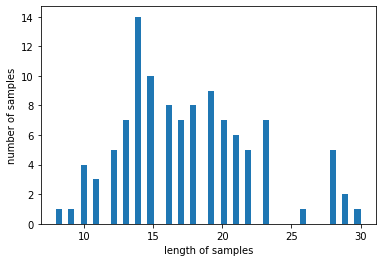

In [12]:
import matplotlib.pyplot as plt

plt.hist([len(s) for s in sentence2vec_list], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = max(map(len, sentence2vec_list))
sequences = pad_sequences(sequence_list, maxlen=max_len, padding='pre')

In [16]:
max_len

30

In [14]:
sequences[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 40], dtype=int32)

In [15]:
np.random.shuffle(sequences)
split_num = int(len(sequences) * 0.8)

X = sequences[:split_num,:-1]
y = sequences[:split_num,-1]

X_test = sequences[split_num:,:-1]
y_test = sequences[split_num:,-1]

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GRU

model = Sequential()
model.add(Embedding(5000, 300, input_length=max_len-1, mask_zero=True)) 
# 레이블을 분리하였으므로 이제 X의 길이는 max_len-1
model.add(GRU(128))
model.add(Dense(5000, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# sparse_categorical_crossentropy
# categorical_crossentropy와 다른점은 정답 integer값을 원-핫벡터로 만들어주지 않아도 된다는점

model.summary()

hist = model.fit(X, y,validation_split=0.1, shuffle=True, epochs=100, batch_size=30, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 29, 300)           1500000   
                                                                 
 gru (GRU)                   (None, 128)               165120    
                                                                 
 dense (Dense)               (None, 5000)              645000    
                                                                 
Total params: 2,310,120
Trainable params: 2,310,120
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
47/47 [==============================] - 12s 148ms/step - loss: 6.3597 - accuracy: 0.2393 - val_loss: 3.9171 - val_accuracy: 0.1154
Epoch 2/100
47/47 [==============================] - 7s 140ms/step - loss: 3.6782 - accuracy: 0.1755 - val_loss: 3.7669 - val_accuracy: 0.1218
Epoch 3/100
47/47 [====

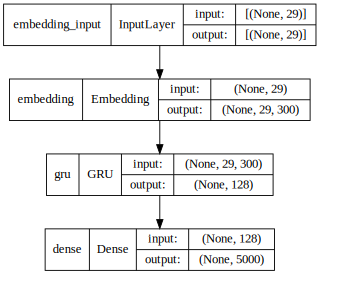

In [19]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

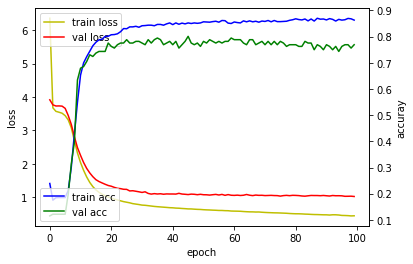

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [21]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

13/13 [==============================] - 0s 10ms/step - loss: 0.8811 - accuracy: 0.7938

loss : 0.8811118602752686
accuray : 0.7938144207000732


In [22]:
n = 35
max_len = 30


current_word = '차'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''

for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break;
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'차가 있습니다'

In [23]:
n = 35


current_word = '사람이'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''

for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break;
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'사람이 다가오고 있습니다'

In [25]:
n = 35


current_word = '사람들이'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''

for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break;
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'사람들이 여럿 있습니다'

In [26]:
n = 35
key = ['사람', '차']
for k in key:
  current_word = k
  init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
  sentence = ''
  for _ in range(n): # n번 반복
      encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
      # 현재 단어에 대한 정수 인코딩
      
      encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
      # 데이터에 대한 패딩
      
      result = np.argmax(model.predict(encoded), axis=-1) 
    
      # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
      for word, index in char2idx.items(): 
          if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
              break # 해당 단어가 예측 단어이므로 break
      current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
      sentence = sentence + word # 예측 단어를 문장에 저장
      if word == '<EOS>':
          break;
  # for문이므로 이 행동을 다시 반복
  sentence = init_word + sentence
  sentence.replace('<EOS>',"")
  print(sentence)

사람이 다가오고 있습니다<EOS>
차가 있습니다<EOS>


모델 저장

In [27]:
from keras.models import load_model
model.save('senten_generating_model.h5')

모델 불러와 사용해보기

In [40]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

from keras.models import load_model
model = load_model('/content/senten_generating_model.h5')

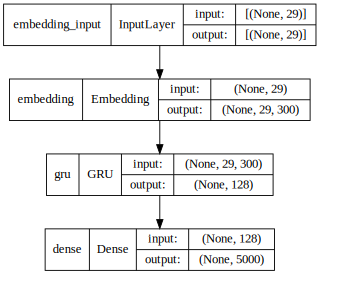

In [41]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

In [42]:
import pickle

# load data
with open('/Users/hongseongmi/Documents/git_ws/Yooninahong/description/data/char2idx.pickle', 'rb') as fr:
    train = pickle.load(fr)

# show data
print(train)

{'자': 1, '거': 2, '동': 3, '를': 4, '른': 5, ' ': 6, '럿': 7, '치': 8, '앞': 9, '오': 10, '갑': 11, '바': 12, '보': 13, '러': 14, '가': 15, ',': 16, '옵': 17, '되': 18, '킥': 19, '대': 20, '옆': 21, '다': 22, '설': 23, '져': 24, '세': 25, '탄': 26, '습': 27, '서': 28, '둘': 29, '전': 30, '과': 31, '들': 32, '볼': 33, '람': 34, '토': 35, '어': 36, '늘': 37, '여': 38, '쪽': 39, '사': 40, '니': 41, '차': 42, '라': 43, '이': 44, '에': 45, '워': 46, '두': 47, '걸': 48, '고': 49, '있': 50, '놓': 51, '몇': 52, '<EOS>': 53, '타': 54, '드': 55, '와': 56}


In [43]:
n = 35
max_len = 30

current_word = '사람'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''

for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break;
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'사람이 다가오고 있습니다'

In [31]:
n = 35
max_len = 30

current_word = '차'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''

for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break;
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'차가 있습니다'

In [44]:
n = 35
max_len = 30
total = []

key = ['사람', '차']
klen = len(key)
print(klen)

for k in key:
  current_word = k
  init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
  sentence = ''
  for _ in range(n): # n번 반복
      encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
      # 현재 단어에 대한 정수 인코딩
      
      encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
      # 데이터에 대한 패딩
      
      result = np.argmax(model.predict(encoded), axis=-1) 
    
      # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
      for word, index in char2idx.items(): 
          if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
              break # 해당 단어가 예측 단어이므로 break
      current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
      sentence = sentence + word # 예측 단어를 문장에 저장
      if word == '<EOS>':
          break;
  # for문이므로 이 행동을 다시 반복
  sentence = init_word + sentence
  if klen > 1:
    sentence = sentence.replace('습니다<EOS>',"고 ")
    klen -= 1
  else:
    sentence = sentence.replace('<EOS>',"")
  print(sentence)
  total.append(sentence)

print(''.join(total))

2
사람이 다가오고 있고 
차가 있습니다
사람이 다가오고 있고 차가 있습니다
